In [34]:
from math import log, sqrt, exp
from scipy.stats import norm

# create a class for stock option which is initialized with the following attributes: 
# K : float : Strike price 
# T : float : Time to maturity (in years) 
# option_type : str : "call" for call option, "put" for put option

class StockOption:
    def __init__(self, K: float, T: float, option_type: str):
        self.K = K  # Strike price
        self.T = T  # Time to maturity (in years)
        self.option_type = option_type  # "call" for call option, "put" for put option

    def __repr__(self):
        return f"Strike K={self.K}, Expiration T={self.T}, option_type='{self.option_type}'"

    # Define a method PV which is a function to price the option using Black-Scholes formula, 
    # given the current stock price S, the implied volatility sigma, and the annual risk free rate r
    def PV(self, S: float, sigma: float, r: float) -> float:

        self.S = S  # Current stock price

        d1 = (log(S / self.K) + (r + 0.5 * sigma**2) * self.T) / (sigma * sqrt(self.T))
        d2 = d1 - sigma * sqrt(self.T)

        if self.option_type == "call":
            price = S * norm.cdf(d1) - self.K * exp(-r * self.T) * norm.cdf(d2)
        elif self.option_type == "put":
            price = self.K * exp(-r * self.T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        else:
            raise ValueError("Invalid option type. Must be 'call' or 'put'.")

        return price
    
    # Define a method delta which calculates the delta of the option,
    # which is the sensitivity of the option price to changes in the stock price
    # given the current stock price S, the implied volatility sigma, and the annual risk free rate r
    def delta(self, S: float, sigma: float, r: float) -> float:
        d1 = (log(S / self.K) + (r + 0.5 * sigma**2) * self.T) / (sigma * sqrt(self.T))

        if self.option_type == "call":
            delta_value = norm.cdf(d1)
        elif self.option_type == "put":
            delta_value = norm.cdf(d1) - 1
        else:
            raise ValueError("Invalid option type. Must be 'call' or 'put'.")

        return delta_value

    # Define a method gamma which calculates the gamma of the option,
    # which is the sensitivity of delta to changes in the stock price
    def gamma(self, S: float, sigma: float, r: float) -> float:
        d1 = (log(S / self.K) + (r + 0.5 * sigma**2) * self.T) / (sigma * sqrt(self.T))
        gamma_value = norm.pdf(d1) / (S * sigma * sqrt(self.T))
        return gamma_value

    # Define a method theta which calculates the theta of the option,
    # which is the sensitivity of the option price to changes in time to maturity
    def theta(self, S: float, sigma: float, r: float) -> float:
        d1 = (log(S / self.K) + (r + 0.5 * sigma**2) * self.T) / (sigma * sqrt(self.T))
        d2 = d1 - sigma * sqrt(self.T)

        term1 = -(S * norm.pdf(d1) * sigma) / (2 * sqrt(self.T))
        if self.option_type == "call":
            term2 = r * self.K * exp(-r * self.T) * norm.cdf(d2)
            theta_value = term1 - term2
        elif self.option_type == "put":
            term2 = r * self.K * exp(-r * self.T) * norm.cdf(-d2)
            theta_value = term1 + term2
        else:
            raise ValueError("Invalid option type. Must be 'call' or 'put'.")

        return theta_value

    # Define a method rho which calculates the rho of the option,
    # which is the sensitivity of the option price to changes in the risk-free rate
    def rho(self, S: float, sigma: float, r: float) -> float:
        d1 = (log(S / self.K) + (r + 0.5 * sigma**2) * self.T) / (sigma * sqrt(self.T))
        d2 = d1 - sigma * sqrt(self.T)

        if self.option_type == "call":
            rho_value = self.K * self.T * exp(-r * self.T) * norm.cdf(d2)
        elif self.option_type == "put":
            rho_value = -self.K * self.T * exp(-r * self.T) * norm.cdf(-d2)
        else:
            raise ValueError("Invalid option type. Must be 'call' or 'put'.")

        return rho_value

    # Define a method vega which calculates the vega of the option,
    # which is the sensitivity of the option price to changes in implied volatility
    def vega(self, S: float, sigma: float, r: float) -> float:
        d1 = (log(S / self.K) + (r + 0.5 * sigma**2) * self.T) / (sigma * sqrt(self.T))
        vega_value = S * norm.pdf(d1) * sqrt(self.T)
        return vega_value




In [35]:
x = StockOption(100, 0.25, "call")

print(x)
print(x.PV(100, 0.2, 0.05))  # Example usage of PV method
print(x.delta(100, 0.2, 0.05))  # Example usage of delta method
print(x.gamma(100, 0.2, 0.05))  # Example usage of gamma method
print(x.theta(100, 0.2, 0.05))  # Example usage of theta method
print(x.rho(100, 0.2, 0.05))    # Example usage of rho method
print(x.vega(100, 0.2, 0.05))   # Example usage of vega method


Strike K=100, Expiration T=0.25, option_type='call'
4.614997129602855
0.5694601832076737
0.03928800094473793
-10.474151248505812
13.082755297791127
19.644000472368965


In [40]:
strike_price = 100
time_to_maturity = 0.25

stock_prices = np.linspace(strike_price-50, strike_price+50, 100) 


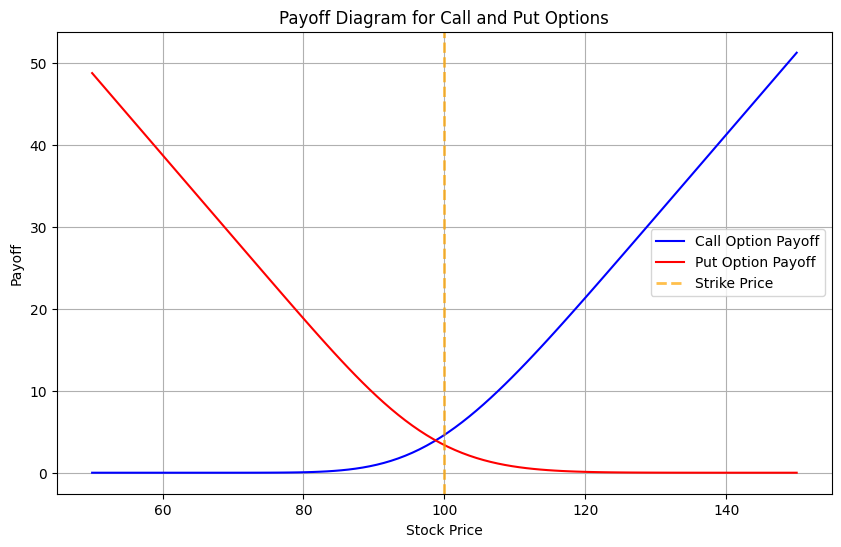

In [41]:
import matplotlib.pyplot as plt

# Create call and put options
call_option = StockOption(K=strike_price, T=time_to_maturity, option_type="call")
put_option = StockOption(K=strike_price, T=time_to_maturity, option_type="put")

# Calculate the payoff for call and put options using the PV function
call_payoff = [call_option.PV(price, implied_volatility, risk_free_rate) for price in stock_prices]
put_payoff = [put_option.PV(price, implied_volatility, risk_free_rate) for price in stock_prices]

# Plot the payoff diagram
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, call_payoff, label="Call Option Payoff", color="blue")
plt.plot(stock_prices, put_payoff, label="Put Option Payoff", color="red")
#plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.title("Payoff Diagram for Call and Put Options")
plt.xlabel("Stock Price")
plt.ylabel("Payoff")
plt.grid()
plt.axvline(strike_price, color="orange", linewidth=2, linestyle="--", alpha=0.7, label="Strike Price")
plt.legend()
plt.show()
